In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def choose_initial_cluster_centers(points, clusters):
    us = np.zeros((clusters,784))         # centers of each cluster
    indicies = np.zeros(clusters)

    index = np.random.choice(points.shape[0], 1)[0]         # choose first point randomly
    indicies[0] = index
    us[0] =  points[index]

    for i in range(1,clusters):
        max_distance = 0
        for j in range(points.shape[0]):    # choose the center with the biggest distancce form last center
            if j not in indicies:           # check if the the point is already a center to cluster
                point = np.array(points[j])
                last_point = us[i-1]
                distance = np.linalg.norm(point-last_point)     # Eucledian distance

                if distance > max_distance:
                    max_distance = distance
                    index = j
                    u = point
        
        
        indicies[i] = index
        us[i] = u

    return us

In [3]:
def compute_membership(centers, point, rnks):
    min_distance = np.linalg.norm(point-centers[0])

    index = 0
    for i in range(1,centers.shape[0]):
        
        center = centers[i]
        distance = np.linalg.norm(point-center)

        if distance < min_distance and distance > 0:
            min_distance = distance
            index = i
        elif distance == min_distance and distance > 0:      # if the distances are the same between two centers, choose the one with more members
            if rnks[i] > rnks[index]:
                index = i

    return index, min_distance

In [14]:
def kmeans(points, clusters, labels):

    old_centers = np.zeros((clusters,784))
    centers = choose_initial_cluster_centers(points, clusters)
    
    for limit in range(200):
        
        if (np.array_equal(centers, old_centers)):      # stop if the algorithm converges
            print("Iterations till convergence: ", limit)
            break

        # print("Iteration Number : ")
        # print(limit)

        points_sum = np.zeros((10,784))
        rnks = np.zeros(clusters)       # used for counting number of members in each cluster
        distances = np.zeros(clusters)  # sum of distances in each cluster from the points to the cluster centers
        old_centers = np.copy(centers)
        cluster_labels_count = np.zeros((10,10))

        for i in range(points.shape[0]):
            point = points[i]
            rnk, distance = compute_membership(centers, point, rnks)    # returns the cluster number of the point and its distance from the mean of the cluster
            rnks[rnk] += 1
            distances[rnk] += distance
            points_sum[rnk] += point
            cluster_labels_count[rnk][int(labels[i])] += 1
        
        for i in range(clusters): 
            centers[i] = points_sum[i] / rnks[i]         # Adjust the cluster centers

    sum_distances = np.sum(distances)
    
    return centers, sum_distances, rnks, cluster_labels_count

In [5]:
def np_thresholding(npArray, threshold):
    to_zero = npArray < threshold
    to_ones = npArray >= threshold

    npArray[to_zero] = 0
    npArray[to_ones] = 1

In [6]:
images = []

for i in range(2400):
    img = plt.imread("Images/" + str((i+1)) + ".jpg")
    pixels = []
    for j in range(28):
        for k in range(28):
            pixels.append(img[j,k])
    
    images.append(pixels)
    
images = np.asarray(images)
np_thresholding(images, 140)
print(images.shape)

(2400, 784)


In [7]:
imagesT = np.transpose(images)
print(imagesT.shape)

(784, 2400)


In [8]:
labels = np.genfromtxt('Images/Training Labels.txt')
print(labels)

[0. 0. 0. ... 9. 9. 9.]


In [16]:
centers_arr = np.zeros((30,10,784))
distances_arr = np.zeros(30)
rnks = np.zeros((30,10))
cluster_labels_count = np.zeros((30,10,10))

for i in range(30):
    print("Iteration number: ", i)
    centers_arr[i], distances_arr[i], rnks[i], cluster_labels_count[i] = kmeans(images, 10, labels)

index_best = int(np.where(distances_arr == np.amin(distances_arr))[0])

centers_arr_best = centers_arr[index_best]
distances_arr_best = distances_arr[index_best]
rnks_best = rnks[index_best]
cluster_labels_count_best = cluster_labels_count[index_best]

print("Best iteration: ", index_best)
print(cluster_labels_count_best)

Iteration number:  0
Iterations till convergence:  48
Iteration number:  1
Iterations till convergence:  19
Iteration number:  2
Iterations till convergence:  28
Iteration number:  3
Iterations till convergence:  65
Iteration number:  4
Iterations till convergence:  23
Iteration number:  5
Iterations till convergence:  32
Iteration number:  6
Iterations till convergence:  39
Iteration number:  7
Iterations till convergence:  53
Iteration number:  8
Iterations till convergence:  52
Iteration number:  9
Iterations till convergence:  34
Iteration number:  10
Iterations till convergence:  22
Iteration number:  11
Iterations till convergence:  35
Iteration number:  12
Iterations till convergence:  59
Iteration number:  13
Iterations till convergence:  23
Iteration number:  14
Iterations till convergence:  56
Iteration number:  15
Iterations till convergence:  35
Iteration number:  16
Iterations till convergence:  23
Iteration number:  17
Iterations till convergence:  20
Iteration number:  1

[107. 149. 144. 112. 123.  88. 182. 147. 132.   0.]


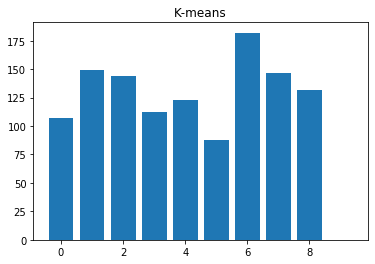

<Figure size 432x288 with 0 Axes>

In [18]:
cluster_labels_count_plot = np.copy(cluster_labels_count_best)

x = np.arange(10)
y = np.zeros(10)

for i in range(10):
    y[i] = np.amax(cluster_labels_count_plot[0:, i:(i+1)])
    cluster_labels_count_plot[int(np.where(cluster_labels_count_plot == np.amax(cluster_labels_count_plot[0:, i : (i+1)]))[0][0])] *= 0

print(y)

plt.figure()

plt.bar(x, y)
plt.title('K-means')

plt.show()
plt.savefig('Counts.jpg')